In [228]:
import numpy as np
import pandas as pd
import discogs_client
from dotenv import load_dotenv
import os
from IPython import display
import random
import requests

In [229]:
d = discogs_client.Client('ExampleApplication/0.1', user_token= os.getenv('my_user_token'))

In [6]:
me=d.identity()
print(me)

<User 723013 'arcadybliss'>


In [7]:
for item in me.collection_folders[0].releases:
    print(item)

<CollectionItemInstance 3068785 'This Is Augustus Pablo'>
<CollectionItemInstance 712158 'Dazz'>
<CollectionItemInstance 442490 'Synchronicity'>
<CollectionItemInstance 1022839 'Young And Rich'>
<CollectionItemInstance 611451 'The Singles 1969-1973'>
<CollectionItemInstance 1473508 'Hits Of Gold'>
<CollectionItemInstance 4290679 "Can't Buy A Thrill">
<CollectionItemInstance 4383259 'Shaved Fish'>
<CollectionItemInstance 453773 'Sky 2'>
<CollectionItemInstance 773190 'I Robot'>
<CollectionItemInstance 6339387 'The Pretender'>
<CollectionItemInstance 588440 'Hotel California'>
<CollectionItemInstance 1943717 'Look At Us'>
<CollectionItemInstance 2710859 'The Big Roar'>
<CollectionItemInstance 8855958 'Warm On A Cold Night'>
<CollectionItemInstance 7404970 "Not The Nine O'Clock News...">
<CollectionItemInstance 606466 "Not The Nine O'Clock News...">
<CollectionItemInstance 2922191 'The English Riviera'>
<CollectionItemInstance 12020608 'The Return'>
<CollectionItemInstance 1258803 "Love M

In [8]:
print(dir(me.collection_folders[0].releases[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_known_invalid_keys', 'changes', 'client', 'data', 'date_added', 'delete', 'fetch', 'folder_id', 'id', 'instance_id', 'notes', 'previous_request', 'rating', 'refresh', 'release', 'save']


In [10]:
raw_collection_data = [release.data for release in me.collection_folders[0].releases]

In [11]:
len(raw_collection_data)

197

In [12]:
raw_collection_data[100].keys()

dict_keys(['id', 'instance_id', 'date_added', 'rating', 'basic_information', 'folder_id'])

In [13]:
raw_collection_data[100]['basic_information'].keys()

dict_keys(['id', 'master_id', 'master_url', 'resource_url', 'thumb', 'cover_image', 'title', 'year', 'formats', 'labels', 'artists', 'genres', 'styles'])

In [14]:
raw_collection_data[100]

{'id': 5667894,
 'instance_id': 338016219,
 'date_added': '2018-12-09T15:30:09-08:00',
 'rating': 0,
 'basic_information': {'id': 5667894,
  'master_id': 46944,
  'master_url': 'https://api.discogs.com/masters/46944',
  'resource_url': 'https://api.discogs.com/releases/5667894',
  'thumb': 'https://i.discogs.com/jEI2OnowODlph_OlAMspsVQny8KLELBnBI0Rp3TAaHs/rs:fit/g:sm/q:40/h:150/w:150/czM6Ly9kaXNjb2dz/LWRhdGFiYXNlLWlt/YWdlcy9SLTU2Njc4/OTQtMTUwMjMxMDgy/MC02ODc4LmpwZWc.jpeg',
  'cover_image': 'https://i.discogs.com/0dvQsgevbGakfNGqev3rVRAH_6O48-0wXeXZ7846_x8/rs:fit/g:sm/q:90/h:591/w:600/czM6Ly9kaXNjb2dz/LWRhdGFiYXNlLWlt/YWdlcy9SLTU2Njc4/OTQtMTUwMjMxMDgy/MC02ODc4LmpwZWc.jpeg',
  'title': 'Pilgrimage',
  'year': 1971,
  'formats': [{'name': 'Vinyl',
    'qty': '1',
    'text': 'Gatefold, Red/Brown "Dogbone"',
    'descriptions': ['LP', 'Album']}],
  'labels': [{'name': 'MCA Records',
    'catno': 'MDKS 8004',
    'entity_type': '1',
    'entity_type_name': 'Label',
    'id': 878,
    'resou

In [15]:
len(raw_collection_data)

197

In [16]:
"""
Extract required info from the raw collection data
"""
ids = [release['id'] for release in raw_collection_data]
artists = [release['basic_information']['artists'][0]['name'] for release in raw_collection_data]
titles = [release['basic_information']['title'] for release in raw_collection_data]
years = [release['basic_information']['year'] for release in raw_collection_data]
genres = cover_image_urls = [release['basic_information']['genres'][0]for release in raw_collection_data]
formats = [release['basic_information']['formats'][0]['name']for release in raw_collection_data]
cover_image_urls = [release['basic_information']['cover_image']for release in raw_collection_data]
thumb_urls = [release['basic_information']['thumb'] for release in raw_collection_data]

In [217]:
"""
Make a Pandas dataframe of the relevant collection data
"""
collection_df = pd.DataFrame(data = list(zip(ids, artists, titles, years, genres, formats, cover_image_urls, thumb_urls)), columns=['Discogs ID', 'Artist', 'Title', 'Year', 'Genre', 'Format', 'Cover URL', 'Thumb URL'])
collection_df[0:15]

,Discogs ID,Artist,Title,Year,Genre,Format,Cover URL,Thumb URL
0,3068785,Augustus Pablo,This Is Augustus Pablo,2011,Reggae,Vinyl,https://i.discogs.com/15aqwiUEUaq5W0kFSCOdhmXg...,https://i.discogs.com/AESPi0HqFR2cLVt_63aniCjn...
1,712158,Kinsman Dazz,Dazz,1979,Funk / Soul,Vinyl,https://i.discogs.com/nNGy5Y9DoLVT6kSdhBuuwhVc...,https://i.discogs.com/n_iDkCwKZvm4tOBANLpfDX5n...
2,442490,The Police,Synchronicity,1983,Rock,Vinyl,https://i.discogs.com/-_zH6T6k8_SOb1j23-CZcOkf...,https://i.discogs.com/m0dh-YjmQzWvunwSsopsX0zl...
3,1022839,The Tubes,Young And Rich,1976,Rock,Vinyl,https://i.discogs.com/MWVA1sN3kYzEuB49c088DA6d...,https://i.discogs.com/JFb3I8agcy0c22ZfUKcrtAj5...
4,611451,Carpenters,The Singles 1969-1973,1973,Rock,Vinyl,https://i.discogs.com/mv3jvx2uWoNi71Tv9rBCk3YZ...,https://i.discogs.com/IEv7ab527SgZxRLoNqEXCzqN...
5,1473508,The Mamas & The Papas,Hits Of Gold,1974,Rock,Vinyl,https://i.discogs.com/Rw-H_-bT8If3Ye9b_WSAR1j0...,https://i.discogs.com/oJJQXd5wrZCb8t3ih0zs7wn8...
6,4290679,Steely Dan,Can't Buy A Thrill,1974,Rock,Vinyl,https://i.discogs.com/X6YxT_WeaVjj_l5ALhkenAZZ...,https://i.discogs.com/QJJzx7Ius7xSZ7hknWjWj1xw...
7,4383259,John Lennon,Shaved Fish,1975,Rock,Vinyl,https://i.discogs.com/7siMxbq1lgdT37JRo8Pj0oJg...,https://i.discogs.com/4l5Hr-7l7zs45BjTE7S2an25...
8,453773,Sky (4),Sky 2,1980,Rock,Vinyl,https://i.discogs.com/Dp28n35Dq_k54jIBKSoxn9-f...,https://i.discogs.com/8nglyBAzRC9RA-cEPfg4Q6eW...
9,773190,The Alan Parsons Project,I Robot,1977,Rock,Vinyl,https://i.discogs.com/5-QoHy8gAr3amY2zdneDOaCv...,https://i.discogs.com/qxGop9Uvn_i-4H27z0-y7SrN...


In [218]:
"""
Just the Vinyl
"""
collection_df = collection_df[collection_df['Format'] == 'Vinyl']
collection_df.shape

(190, 8)

In [219]:
collection_size = collection_df.shape[0]
collection_size

190

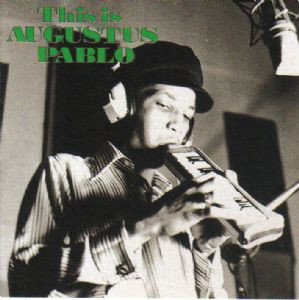

In [220]:
display.Image(collection_df.loc[0][6])

In [221]:
def show_vinyl(disc):
    cover = display.Image(collection_df.loc[disc][6])
    print(
        f"{collection_df.loc[disc][1]}\n{collection_df.loc[disc][2]} ({collection_df.loc[disc][3]})\n{collection_df.loc[disc][4]}")
    return cover

In [222]:
def shuffle():
    disc = random.choice(list(collection_df.index))
    return show_vinyl(disc)

The Cribs
Men's Needs, Women's Needs, Whatever (2007)
Rock


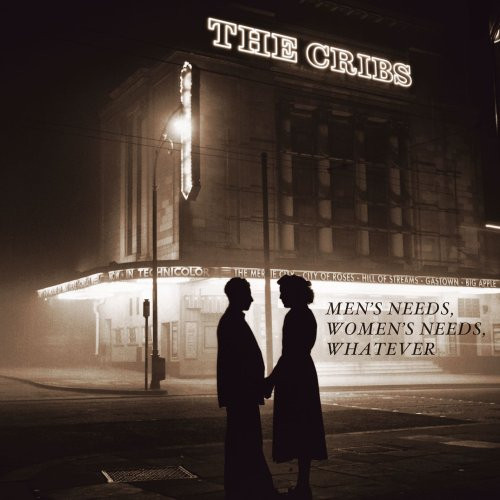

In [293]:
shuffle()

In [287]:
# Create a CSV file of the Vinyl Collection

collection_df.to_csv('vinyl_collection.csv', index=False)

In [288]:
collection = pd.read_csv('vinyl_collection.csv')

In [290]:
collection.head()

,Discogs ID,Artist,Title,Year,Genre,Format,Cover URL,Thumb URL
0,3068785,Augustus Pablo,This Is Augustus Pablo,2011,Reggae,Vinyl,https://i.discogs.com/15aqwiUEUaq5W0kFSCOdhmXg...,https://i.discogs.com/AESPi0HqFR2cLVt_63aniCjn...
1,712158,Kinsman Dazz,Dazz,1979,Funk / Soul,Vinyl,https://i.discogs.com/nNGy5Y9DoLVT6kSdhBuuwhVc...,https://i.discogs.com/n_iDkCwKZvm4tOBANLpfDX5n...
2,442490,The Police,Synchronicity,1983,Rock,Vinyl,https://i.discogs.com/-_zH6T6k8_SOb1j23-CZcOkf...,https://i.discogs.com/m0dh-YjmQzWvunwSsopsX0zl...
3,1022839,The Tubes,Young And Rich,1976,Rock,Vinyl,https://i.discogs.com/MWVA1sN3kYzEuB49c088DA6d...,https://i.discogs.com/JFb3I8agcy0c22ZfUKcrtAj5...
4,611451,Carpenters,The Singles 1969-1973,1973,Rock,Vinyl,https://i.discogs.com/mv3jvx2uWoNi71Tv9rBCk3YZ...,https://i.discogs.com/IEv7ab527SgZxRLoNqEXCzqN...


In [ ]:
# chat gpt code for app
import tkinter as tk
from tkinter import PhotoImage
import pandas as pd
import requests
from io import BytesIO

# Create the main window
window = tk.Tk()
window.title("My GUI")
window.geometry("3000x3000")

# Read the CSV file
df = pd.read_csv("images.csv")
image_urls = df["URL"].tolist()


# Create the shuffle button
def shuffle():
    # Choose a random image URL
    import random
    image_url = random.choice(image_urls)

    # Read the image from the URL
    response = requests.get(image_url)
    image = PhotoImage(data=BytesIO(response.content).getvalue())

    # Display the image
    label = tk.Label(image=image)
    label.image = image  # Keep a reference to the image to prevent garbage collection
    label.pack()


button = tk.Button(text="Shuffle", command=shuffle)
button.pack()

# Run the main loop
window.mainloop()
